In [1]:
import pandas as pd
import zipfile
import kaggle

In [2]:
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

london-bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
#extract the file from the downloaded zipfile

zipfile_name= 'london-bike-sharing-dataset.zip'
with zipfile.ZipFile(zipfile_name,'r')as file:
    file.extractall()

In [3]:
#read in the csv as the pandas datframe

bikes=pd.read_csv("london_merged.csv")

In [9]:
#exploring the datframe

bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [4]:
bikes.shape

(17414, 10)

In [5]:
bikes


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [13]:
#count the unique values in the weather code column

bikes.weather_code.value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [14]:
#unique values in season column

bikes.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [7]:
#changing the column names

new_cols_dict = {
    'timestamp': 'time',
    'cnt': 'count',
    't1': 'temp_real_c',
    't2': 'temp_feels_like_c',
    'hum': 'humidity_percent',
    'wind_speed': 'wind_speed_kph',
    'weather_code': 'weather',
    'is_holiday': 'is_holiday',
    'is_weekend': 'is_weekend',
    'season': 'season'
}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)


In [8]:
print(bikes.head())

                  time  count  temp_real_c  temp_feels_like_c  \
0  2015-01-04 00:00:00    182          3.0                2.0   
1  2015-01-04 01:00:00    138          3.0                2.5   
2  2015-01-04 02:00:00    134          2.5                2.5   
3  2015-01-04 03:00:00     72          2.0                2.0   
4  2015-01-04 04:00:00     47          2.0                0.0   

   humidity_percent  wind_speed_kph  weather  is_holiday  is_weekend  season  
0              93.0             6.0      3.0         0.0         1.0     3.0  
1              93.0             5.0      1.0         0.0         1.0     3.0  
2              96.5             0.0      1.0         0.0         1.0     3.0  
3             100.0             0.0      1.0         0.0         1.0     3.0  
4              93.0             6.5      1.0         0.0         1.0     3.0  


In [9]:
#changing the humidity value to percentage (i.e value between 0 to 1)

bikes.humidity_percent=bikes.humidity_percent/100


In [10]:
bikes.humidity_percent

0        0.930
1        0.930
2        0.965
3        1.000
4        0.930
         ...  
17409    0.810
17410    0.810
17411    0.785
17412    0.760
17413    0.760
Name: humidity_percent, Length: 17414, dtype: float64

In [11]:
# creating a season dictionary so that we can map the integers 0-3 to the actual written values
season_dict = {
    '0.0': 'spring',
    '1.0': 'summer',
    '2.0': 'autumn',
    '3.0': 'winter'
}

# creating a weather dictionary so that we can map the integers to the actual written values
weather_dict = {
    '1.0': 'Clear',
    '2.0': 'Scattered clouds',
    '3.0': 'Broken clouds',
    '4.0': 'Cloudy',
    '7.0': 'Rain',
    '10.0': 'Rain with thunderstorm',
    '26.0': 'Snowfall'
}

# changing the seasons column data type to string
bikes['season'] = bikes['season'].astype('str')

# mapping the values 0-3 to the actual written seasons
bikes['season'] = bikes['season'].map(season_dict)


# changing the weather column data type to string
bikes['weather'] = bikes['weather'].astype('str')

# mapping the values to the actual written weathers
bikes['weather'] = bikes['weather'].map(weather_dict)


In [12]:
bikes.head()

,time,count,temp_real_c,temp_feels_like_c,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


In [ ]:
#saving the changes and exporting as csv

bikes.to_excel('london_bikes_final.xlsx', sheet_name='data')

In [14]:
import matplotlib.pyplot as plt

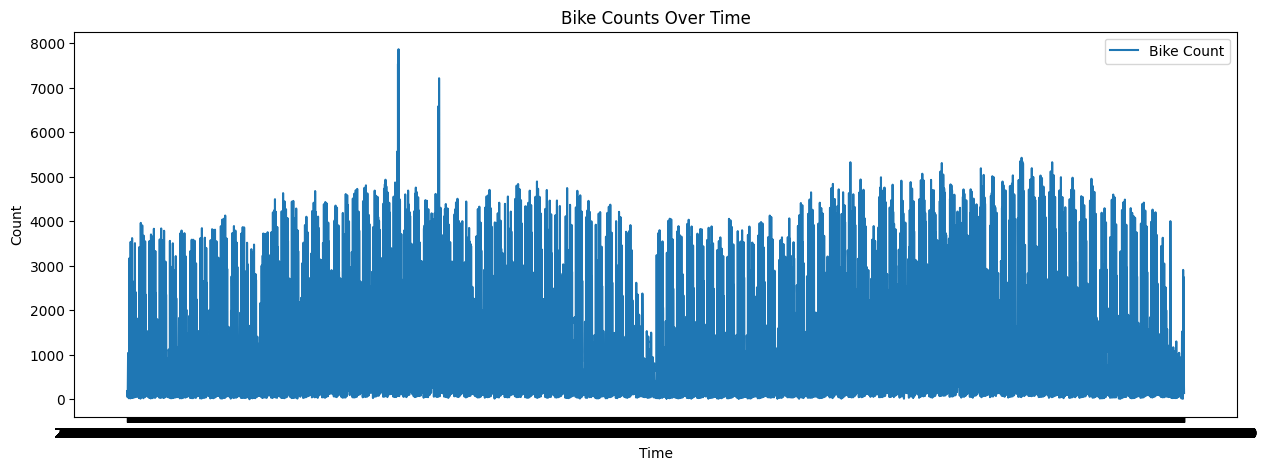

In [17]:
# Plotting the bike count over time
plt.figure(figsize=(15, 5))
plt.plot(bikes['time'], bikes['count'], label='Bike Count')
plt.title('Bike Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()

### Bike Counts Over Time Analysis

- **Trend**: The plot shows the number of bikes rented over time. It appears to exhibit a pattern consistent with daily fluctuations, suggesting higher rentals during specific hours of the day. This could correspond with rush hour traffic, indicating more rentals as people commute to and from work.

- **Seasonality**: There may be underlying seasonal trends, such as increased usage during warmer months and decreased during colder months, which are not immediately apparent from this plot alone but could be inferred from the periodic rises and falls in bike counts.

- **Spikes**: There are noticeable spikes in the bike counts at certain points. These could be due to specific events, promotions, or particularly good weather days that encouraged more people to rent bikes.

- **Outliers**: The plot also shows some extreme values which could be outliers. These could be due to data recording errors, special events, or days with extreme weather conditions.

- **General Observations**: The general trend seems to be relatively stable without a clear long-term increase or decrease, indicating a steady demand for bike rentals over the period shown.

- **Implications for Business**: This analysis could help the bike rental service to better allocate resources and prepare for expected demand. For instance, ensuring more bikes are available during expected peak hours, or considering promotional activities during typically low-usage periods to increase demand.


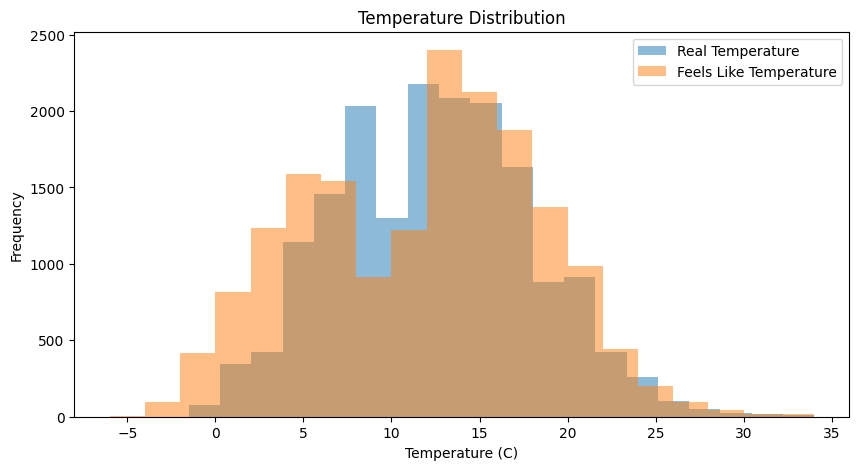

In [18]:
#Histogram for temperature distribution.

plt.figure(figsize=(10, 5))
plt.hist(bikes['temp_real_c'], bins=20, alpha=0.5, label='Real Temperature')
plt.hist(bikes['temp_feels_like_c'], bins=20, alpha=0.5, label='Feels Like Temperature')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Temperature Distribution Analysis

- **Overlap and Differences**: The histograms show significant overlap, indicating that the 'feels like' temperature is often similar to the actual temperature. The areas of non-overlap might indicate periods of wind chill or humidity affecting the 'feels like' temperature.

- **Mode**: The mode for both temperatures is between 10 to 15 degrees Celsius, suggesting that this is a common temperature range.

- **Skewness**: The distribution of both temperature readings is right-skewed, meaning there are fewer instances of very high temperatures.

- **Outliers**: The tails of the 'feels like' temperature distribution suggest there are rare instances where the perceived temperature is much colder or hotter than the actual temperature.

- **Weather Impact**: The differences between the actual and 'feels like' temperatures can affect the comfort level of bike riders and, consequently, the demand for bike-sharing services.

- **Implications**: Understanding these temperature distributions could help predict bike rental demand, inform the allocation of bikes, and guide preparations for extreme weather conditions.


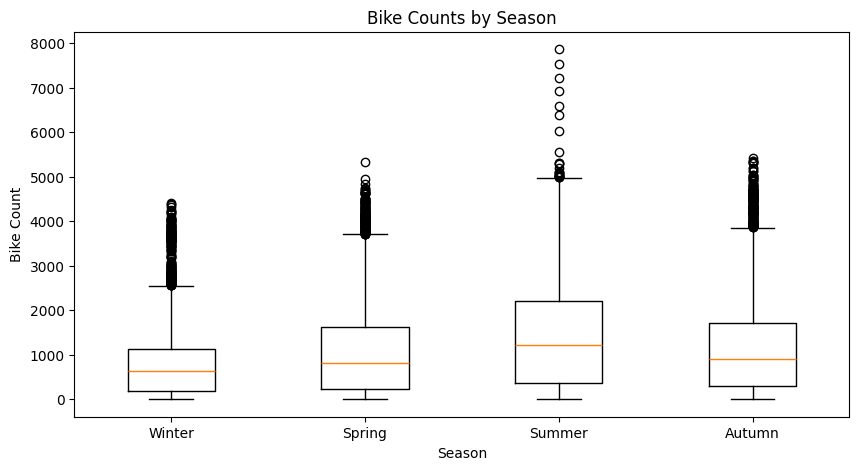

In [19]:
#Boxplot for bike counts by season

plt.figure(figsize=(10, 5))
plt.boxplot([bikes[bikes['season'] == 'winter']['count'],
             bikes[bikes['season'] == 'spring']['count'],
             bikes[bikes['season'] == 'summer']['count'],
             bikes[bikes['season'] == 'autumn']['count']],
            labels=['Winter', 'Spring', 'Summer', 'Autumn'])
plt.title('Bike Counts by Season')
plt.xlabel('Season')
plt.ylabel('Bike Count')
plt.show()


### Bike Counts by Season Analysis

- **Median Bike Count**: The horizontal line in each box represents the median bike count for each season. From the plot, we can see that the median bike count is highest in Summer and lowest in Winter, suggesting a seasonal pattern where bike rentals are more popular during warmer months.

- **Interquartile Range (IQR)**: The length of each box represents the interquartile range (IQR), which contains the middle 50% of the data for that season. The IQR is widest for Summer, indicating greater variability in bike counts during that season, potentially due to variable weather or more tourists.

- **Outliers**: The dots outside the 'whiskers' of the boxplot represent outliers. These could be days with unusually high or low bike counts. For example, the Winter season has fewer outliers compared to the Summer season, which could imply that bike counts are more predictable in the Winter.

- **Seasonal Trends**: The boxplots for Spring and Autumn show that they have similar median bike counts, but Spring has more outliers on the higher end. This might suggest that there are more occasional peaks in bike usage during Spring.

- **Business Insights**: The visualization provides valuable insights for inventory and maintenance planning. For example, more bikes and repair services may be needed in the Summer to accommodate higher and more variable demand. Conversely, fewer resources might be required in Winter.

- **Considerations for Further Analysis**: It could be useful to compare these seasonal trends with weather data to understand the impact of weather conditions on bike rentals. Additionally, investigating the outliers could provide insights into special events or external factors that significantly impact bike usage.


C:\Users\mavur\AppData\Local\Temp\ipykernel_26924\2017543058.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bikes.corr(), annot=True, fmt='.2f', cmap='coolwarm')


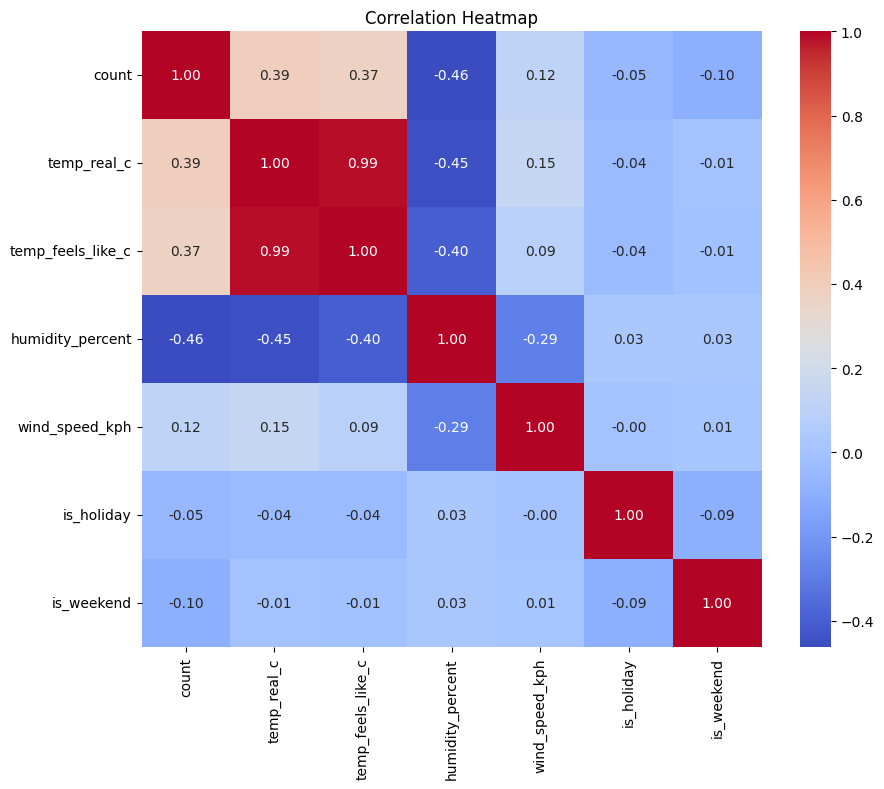

In [20]:
#Correlation heatmap.

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(bikes.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Correlation Heatmap Analysis

The correlation heatmap provides a visual representation of the correlation coefficients between different variables in the dataset. Here's what we can infer from the heatmap:

- **Strong Positive Correlation**: There is a near-perfect positive correlation (`0.99`) between `temp_real_c` and `temp_feels_like_c`, which is expected as these two variables are likely to be very closely related, with 'feels like' temperature being a perceived temperature based on the actual temperature and other factors like humidity and wind.

- **Negative Correlation with Humidity**: Both `temp_real_c` and `temp_feels_like_c` show a moderate negative correlation with `humidity_percent` (`-0.45` and `-0.40` respectively), suggesting that higher temperatures tend to be associated with lower humidity levels in this dataset.

- **Bike Counts Relation with Temperature and Humidity**: The `count` variable, which represents the number of bike rentals, shows a positive correlation with `temp_real_c` and `temp_feels_like_c` (`0.39` and `0.37` respectively), indicating that bike rentals tend to increase with higher temperatures. Conversely, there is a negative correlation between `count` and `humidity_percent` (`-0.46`), indicating fewer rentals on more humid days.

- **Wind Speed**: `wind_speed_kph` does not show a strong correlation with `count`, suggesting that wind speed might not be a primary factor in determining the number of bike rentals.

- **Holidays and Weekends**: Both `is_holiday` and `is_weekend` show very little correlation with `count`, which could imply that the impact of holidays and weekends on bike rental patterns is not significant or is influenced by other factors not shown in this heatmap.

- **Implications**: This analysis can help in predicting bike rentals and in making informed decisions regarding resource allocation. For example, additional bikes and staff may be required on warm, less humid days when more rentals are expected.




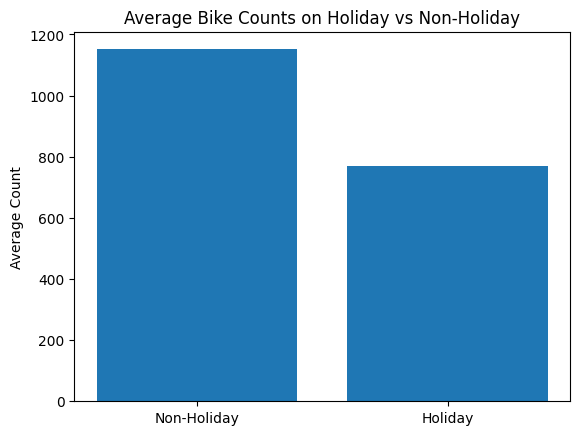

In [21]:
#Bar plot for average bike counts on holidays vs. non-holidays.

avg_counts_holiday = bikes.groupby('is_holiday')['count'].mean()

plt.bar(['Non-Holiday', 'Holiday'], avg_counts_holiday)
plt.title('Average Bike Counts on Holiday vs Non-Holiday')
plt.ylabel('Average Count')
plt.show()


### Average Bike Counts on Holiday vs Non-Holiday Analysis

The bar plot illustrates the comparison between the average number of bike rentals on holidays and non-holidays. The following points summarize the analysis of the bar plot:

- **Higher Usage on Non-Holidays**: The average bike count is visibly higher on non-holidays compared to holidays. This could be due to regular commuters using the bike-sharing system on typical workdays.

- **Holiday Impact**: The lower average count on holidays might suggest that people tend to spend holidays at home or use other modes of transportation for leisure activities that might not involve bike-sharing.

- **Considerations**: While holidays seem to have lower average bike usage, it would be important to consider other factors such as weather conditions, the day of the week on which the holiday falls, and if there is any special event that might affect these numbers.

- **Operational Planning**: This insight could be valuable for operational planning, such as maintenance schedules, staff allocation, and inventory management, as it might be efficient to schedule bike maintenance on holidays when the usage is lower.

- **Promotional Opportunities**: The bike-sharing service might also consider running holiday promotions to increase bike usage during these typically lower-demand days.

This analysis indicates a clear pattern that could help in making data-driven decisions to improve service and operational efficiency.
